In [ ]:
import numpy as np

In [ ]:
def f(x):
    return (x[0]-2)**2+(x[1]-2)**2

In [ ]:
def grad(x):
    return np.array([2*(x[0]-2), 2*(x[1]-2)])


def hess(x):
    return np.array([
        [2, 0], 
        [0, 2]
        ])


def restricciones():
    return np.array([
        [1, 1, 4], 
        [2, -1, 0]])


In [ ]:
def conjuntoActivo(x0, constrains, nEq, nIneq):
    alfa = 0
    k = 0
    # xk = np.zeros(x0.shape)
    xk = x0

    m = constrains.shape[0]
    n = xk.shape[0]

    if (m != (nEq+nIneq)):
        print("Ojo num de restricciones != igualdades + desigualdades")
        return
    wk = calcularActiveSet(xk, constrains, nEq, nIneq)
    Q = armarSistema(xk, constrains, n, m)
    Qb = np.zeros([n+m, 1])

    while True:
        k += 1
        print(f"iteración : {k}")
        Q = armarSistema(xk, constrains, n, m)
        gk = grad(xk)

        for i in range(0, gk.shape[0]):
            Qb[i] = gk[i]

        pk = solSL(Q, Qb, wk)
        print("Soluciones")
        print(Q, wk)
        print("Qb")
        print(Qb, wk)

        for i in range(n, pk.shape[0]):
            pk[i] = pk[i]*-1

        print("pk")
        print(pk, wk)

        print("Wk = {")
        for i in range(n, n+m):
            if (wk[i]):
                print((1+i-n))
        print("}")

        print(f"xk: \n {xk}")

        if (isZeros(pk, n)):
            lambdaNeg = findNegative(pk, n + nEq, wk)
            if lambdaNeg < 0:
                # Terminamos! 
                return xk
                break
            else:
                # Desactivar restriccion
                print(f"Se desactivará la restriccion {1+lambdaNeg -n} del conjunto W")
                wk[lambdaNeg] = False
        else: 
            resultados = calCAlfa(xk,pk,constrains, wk)
        


def calcularActiveSet(x, constrains, nEq, nIneq, TOL=1e-6):
    m = constrains.shape[0]
    n = x.shape[0]
    dim = n+m
    w = np.empty([dim], dtype=bool)
    # condiciones de igualdad
    for i in range(0, n+nEq):
        w[i] = True
    # condiciones de desigualdad
    # nieq?
    for i in range(nEq, m):
        suma = 0
        for j in range(0, n):
            suma += constrains[i][j]*x[j]
        if (abs(suma - constrains[i][n]) <= TOL):
            w[i + (n + nEq)] = True
    return w


def armarSistema(x, A, n, m):
    g = hess(x)
    dimTotal = n + m
    Q = np.zeros([dimTotal, dimTotal])
    # agregamos G
    for i in range(0, n):
        for j in range(0, n):
            Q[i][j] = g[i][j]
    # agregamos A
    for i in range(0, dimTotal):
        for j in range(0, n):
            Q[i][j] = A[i-n][j]
    # agregamos AT
    for i in range(0, n):
        for j in range(n, dimTotal):
            Q[i][j] = A[j-n][i]

    return Q


def solSL(a, b, w):
    """soluciona el sistema linear donde w[k] sea verdadero"""
    n = len(b)
    # Elimination phase
    for m in range(0, n-2):
        if w[m]:
            for k in range(m+1, n-1):
                for i in range(k+1, n):
                    if a[i, k] != 0.0:
                        # if not null define λ
                        lam = a[i, k]/a[k, k]
                        # we calculate the new row of the matrix
                        a[i, k+1:n] = a[i, k+1:n] - lam*a[k, k+1:n]
                        # we update vector b
                        b[i] = b[i] - lam*b[k]
                        # backward substitution
    for k in range(n-1, -1, -1):
        if w[k]:
            b[k] = (b[k] - np.dot(a[k, k+1:n], b[k+1:n]))/a[k, k]
    return b


def isZeros(m, n, TOL=1e-6):
    for i in range(0, n):
        if (abs(m[i]) > TOL):
            return False


def findNegative(pk, inicio, W):
    idxLambda = -1
    minLamda = 0.0
    for i in range(inicio, pk.shape[0]):
        lam = pk[i]
        if W[i] and lam < minLamda:
            minLamda = lam
            idxLambda = i
    return idxLambda

def calCAlfa(xk,pk,constrains, wk):
    m = constrains.shape[0]
    n = xk.shape[0]
    print("calCAlfa")
    print(pk)

    

    

In [ ]:
x = np.array([2,4])
A = restricciones()

xk = conjuntoActivo(x,constrains=A, nEq= 0, nIneq = 2 )


In [ ]:
x = np.array([2, 4])
Qb = np.zeros([4, 1])
gk = grad(x)
for i in range(0, gk.shape[0]):
    Qb[i] = gk[i]


a = -gk.shape[0]
a


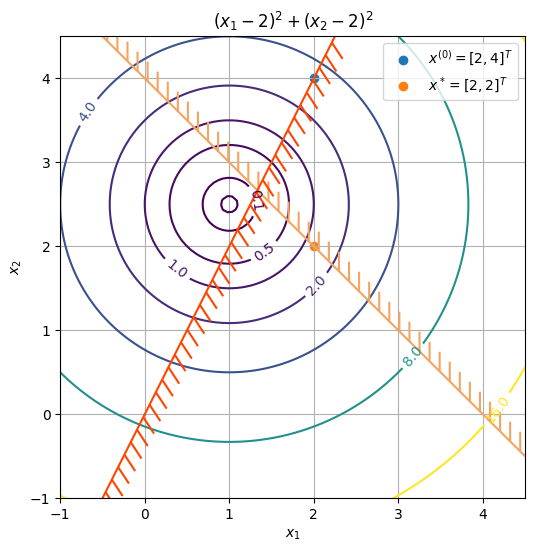

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

fig, ax = plt.subplots(figsize=(6, 6))

nx = 101
ny = 105

# Set up survey vectors
xvec = np.linspace(-1, 4.5, nx)
yvec = np.linspace(-1, 4.5, ny)

# Set up survey matrices.  Design disk loading and gear ratio.
x1, x2 = np.meshgrid(xvec, yvec)

# Evaluate some stuff to plot
obj = (x1-1)**2 + (x2-2.5)**2
g1 = (x1 - 2*x2 +2)
g2 = (x1 - 2*x2 + 6)
g3 = (x1 - 2*x2 + 6)
g4 = (x1 - 2*x2 + 6)

cntr = ax.contour(x1, x2, obj, [0.01, 0.1, 0.5, 1, 2, 4, 8, 16],
                  )
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, g1, [0], colors='sandybrown',)
plt.setp(cg1.collections,
         path_effects=[patheffects.withTickedStroke(angle=135)])

cg2 = ax.contour(x1, x2, g2, [0], colors='orangered')
plt.setp(cg2.collections,
         path_effects=[patheffects.withTickedStroke(angle=60)])

ax.scatter(2, 4,  label="$x^{(0)} = [2,4]^T$")
ax.scatter(2, 2,  label="$x^* = [2,2]^T$")
ax.legend()
ax.grid(True)
ax.set_title("$(x_1 -1)^2 + (x_2 -2.5)^2$")
ax.set(xlabel="$x_1$", ylabel="$x_2$" )
# ax.set_xlim(0, 4)
# ax.set_ylim(0, 4)

plt.show()


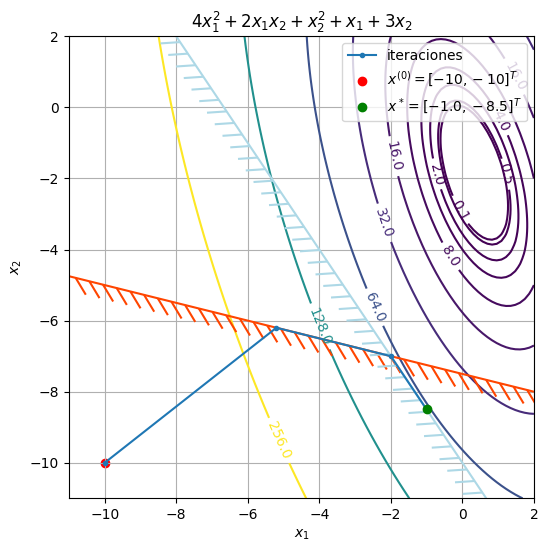

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects

fig, ax = plt.subplots(figsize=(6, 6))

nx = 101
ny = 105

# Set up survey vectors
xvec = np.linspace(-11, 2, nx)
yvec = np.linspace(-11, 2, ny)

# Set up survey matrices.  Design disk loading and gear ratio.
x1, x2 = np.meshgrid(xvec, yvec)

# Evaluate some stuff to plot
obj = 4*x1**2 + 2*(x1*x2) + x2**2 + x1+(3*x2)
g1 = (-(x1/4) - x2 - 7.5)
g2 = (-(3/2)*(x1) - x2 - 10)


cntr = ax.contour(x1, x2, obj, [0.1, .5, 2, 4, 8, 16, 32, 64, 128, 256],
                  )
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)

cg1 = ax.contour(x1, x2, g1, [0], colors='orangered',)
plt.setp(cg1.collections,
         path_effects=[patheffects.withTickedStroke(angle=135)])

cg2 = ax.contour(x1, x2, g2, [0], colors='lightblue')
plt.setp(cg2.collections,
         path_effects=[patheffects.withTickedStroke(angle=60)])

X = [-10, -5.2,-2,-1 ]
Y = [-10, -6.2,-7, -8.5]
ax.plot(X,Y, marker="." , label= "iteraciones")
ax.scatter(-10, -10,  label="$x^{(0)} = [-10,-10]^T$", color='green')
ax.scatter(-1, -8.5,  label="$x^* = [-1.0,-8.5]^T$", color='red' , marker = "o", zorder = 3)
ax.legend()
ax.grid(True)
ax.set_title("$4x_1^2 + 2x_1x_2 + x_2^2 + x_1 + 3x_2$")
ax.set(xlabel="$x_1$", ylabel="$x_2$")
# ax.set_xlim(0, 4)
# ax.set_ylim(0, 4)

plt.show()
